<img src = "images/3_logos.png" width = 600, align = "center">
<br>
<h1 align=center>Réseaux de neurones avec Keras</h1>

## Imports

In [1]:
%matplotlib inline

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time

## Exercice 1 – TensorFlow Playground

[TensorFlow Playground](http://playground.tensorflow.org).

- **Layers et patterns**: essayez d’entraîner le réseau de neurones par défaut en cliquant sur le bouton "Exécuter" (en haut à gauche). Remarquez comment il trouve rapidement une bonne solution pour la tâche de classification. Notez que les neurones de la première couche cachée ont appris des motifs simples, tandis que les neurones de la deuxième couche cachée ont appris à combiner les motifs simples de la première couche cachée en des motifs plus complexes. En général, plus il y a de couches, plus les motifs peuvent être complexes.

- **Fonction d'activation**: essayez de remplacer la fonction d'activation Tanh par la fonction d'activation ReLU, puis entraînez à nouveau le réseau. Notez qu'il trouve une solution encore plus rapidement, mais cette fois, les limites sont linéaires. Cela est dû à la forme de la fonction ReLU.

- **Minima locaux**: modifiez l’architecture du réseau pour n’avoir qu’une couche cachée avec trois neurones. Entraînez-le plusieurs fois (pour réinitialiser les poids du réseau, ajoutez et supprimez un neurone). Notez que le temps d’entraînement varie beaucoup et que parfois, il s’arrête sur un minimum local.

- **Trop petit**: supprimez maintenant un neurone pour ne garder que 2. Notez que le réseau de neurones est maintenant incapable de trouver une bonne solution, même si vous essayez plusieurs fois. Le modèle a trop peu de paramètres et sous-complète systématiquement l'ensemble de formation.

- **Assez grand**: ensuite, définissez un nombre de neurones à 8 et entraînez le réseau plusieurs fois. Notez qu'il est maintenant constamment rapide et ne reste jamais bloqué. Cela met en évidence une découverte importante de la théorie des réseaux de neurones: les grands réseaux de neurones ne se coincent presque jamais dans les minima locaux, et même lorsqu'ils le font, ces optima locaux sont presque aussi bons que l'optimum global. Cependant, ils peuvent rester bloqués sur de longs plateaux pendant longtemps.

- **Gradients profonds et nuls**: changez maintenant le jeu de données en spirale (jeu de données en bas à droite sous "DONNEES"). Changez l'architecture du réseau pour avoir 4 couches cachées de 8 neurones chacune. Notez que l'entraînement prend beaucoup plus de temps et reste souvent bloqué sur des plateaux pendant de longues périodes. Notez également que les neurones situés dans les couches les plus hautes (c’est-à-dire à droite) ont tendance à évoluer plus rapidement que les neurones situés dans les couches les plus basses (c.-à-d. À gauche). Ce problème, appelé le problème des "gradients disparus", peut être résolu en utilisant une meilleure initialisation du poids et d'autres techniques, de meilleurs optimiseurs (tels que AdaGrad ou Adam) ou en utilisant la normalisation par lots.

- **Ensuite**: jouez pendant au moins une heure quand vous avez le temps !

## Exercice 2 – Classification d'images Fashion MNIST

Charger le jeu de données fashion MNIST. Keras a un certain nombre de fonctions (dont load_data()) pour charger des jeux de données populaires dans `keras.datasets`. Le jeu de données est déjà divisé en un jeu d'apprentissage et un jeu de tests, mais il peut être utile de fractionner davantage le jeu d'apprentissage pour obtenir un jeu de validation(5000 echantillons):

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Afficher la taille du jeu d'entrainement :

In [14]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

Afficher la première ligne

In [16]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [17]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Afficher l'echantilon en utilisant la fonction `imshow()` avec un color map en `'binary'`

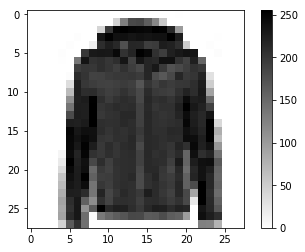

In [18]:
plt.figure()
plt.imshow(X_train[0], cmap='binary')
plt.colorbar()
plt.grid(False)
plt.show()

Afficher les différentes valeurs des labels

In [19]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Noms des classes :

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

La première image correspond donc à un coat :

Afficher les 50 premières images (utiliser des subplots en adaptant la taille de la figure)

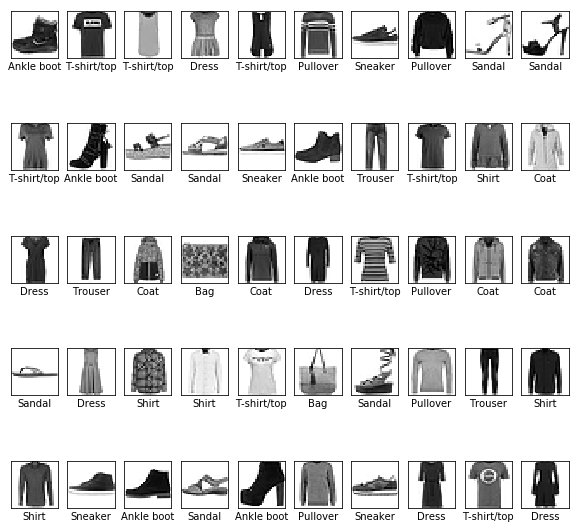

In [21]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

### Construction d'un réseau de neurones de classification avec Keras

### 2.1)
Construire un modèle séquentiel (keras.models.Sequential),(voir [doc](https://keras.io/models/about-keras-models/) ), sans aucun argument, puis ajoutez-y quatre couches en utilisant la méthode add ():
 - une couche Flatten (keras.layers.Flatten) pour convertir chaque image 28x28 en une rangée unique de 784 pixels. Comme il s'agit de la première couche du modèle, il faut spécifier l'argument input_shape en laissant de côté la taille du lot: [28, 28].
- une couche dense (keras.layers.Dense) avec 300 neurones (unités aka) et la fonction d'activation "relu".
- Une autre couche dense avec 100 neurones, également avec la fonction d'activation "relu".
- Une couche dense finale avec 10 neurones (un par classe) et la fonction d'activation "softmax" garantissant que la somme de toutes les probabilités de classe estimées pour chaque image est égale à 1.

In [22]:
def create_model():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(300, activation=tf.nn.relu),
        keras.layers.Dense(100, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

### 2.2)
Utiliser la méthode `summary()` pour étudier l'output.

In [23]:
model.summary()

NameError: name 'model' is not defined

### 2.3) Compilation
Une fois le modèle créé, il faut utiliser la méthode `compile ()` pour spécifier la fonction `loss` et l'` optimiseur` à utiliser. On utilisera "sparse_categorical_crossentropy" pour le loss et l'optimiseur "sgd" (descente de gradient stochastique), spécifier également `metrics` à `accuracy`

In [24]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'model' is not defined

### 2.4)
Entrainer le modèle en utilisant la méthode `fit()`<br/>
**Remarque**: la méthode `fit ()`retourne un objet `History`contenant des statistiques d'entraînement. Il peut être utile de conserver le résultat dans une variable : (history = model.fit (...)).

In [55]:
model = None
model = create_model()
History = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=5)

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 9s 168us/step - loss: 14.4939 - acc: 0.1008 - val_loss: 14.6449 - val_acc: 0.0914
Epoch 2/5
55000/55000 [==============================] - 9s 157us/step - loss: 14.4937 - acc: 0.1008 - val_loss: 14.6449 - val_acc: 0.0914
Epoch 3/5
55000/55000 [==============================] - 9s 157us/step - loss: 14.4937 - acc: 0.1008 - val_loss: 14.6449 - val_acc: 0.0914
Epoch 4/5
55000/55000 [==============================] - 9s 158us/step - loss: 14.4937 - acc: 0.1008 - val_loss: 14.6449 - val_acc: 0.0914
Epoch 5/5
55000/55000 [==============================] - 9s 158us/step - loss: 14.4937 - acc: 0.1008 - val_loss: 14.6449 - val_acc: 0.0914


### 2.5)
Construire un dataframe avec l'objet history puis en faire une représenatation graphique (méthode plot())<br>
*Conseils* : 
- Afficher la grille et limiter les ordonnées à l'intervalle \[0, 1\]
- Il peut être utile de créer une fonction.

In [56]:
History.history

{'val_loss': [14.644902743530274,
  14.644902743530274,
  14.644902743530274,
  14.644902743530274,
  14.644902743530274],
 'val_acc': [0.0914, 0.0914, 0.0914, 0.0914, 0.0914],
 'loss': [14.49389525090998,
  14.493685630659623,
  14.493685637595437,
  14.493685632740368,
  14.493685620255905],
 'acc': [0.10076363636417822,
  0.10078181818236004,
  0.10078181818181818,
  0.1007818181829019,
  0.10078181818181818]}

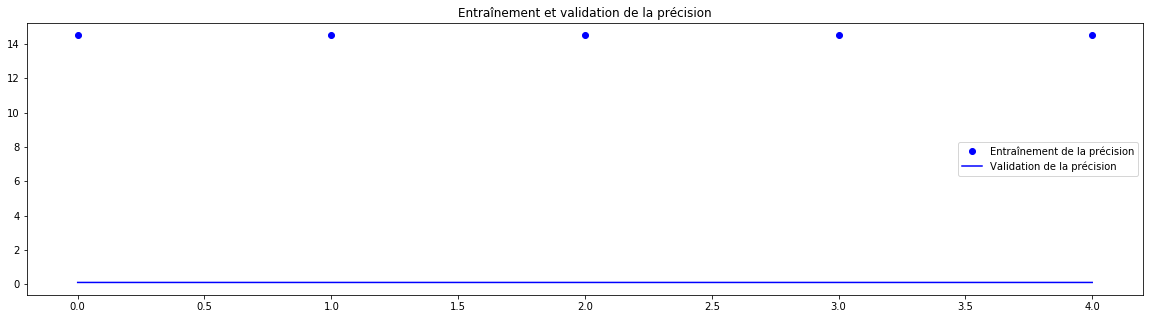

In [57]:
def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']
    
    loss = history.history['loss']
    acc = history.history['acc']

    every_sample =  int(epochs / samples)
    loss = pd.DataFrame(loss)
    acc = pd.DataFrame(acc)

    fig, ax = plt.subplots(figsize=(20,5))

    ax.plot(loss, 'bo', label='Entraînement de la précision')
    ax.plot(acc, 'b', label='Validation de la précision')
    ax.set_title('Entraînement et validation de la précision')
    ax.legend()

plot_history(History)

### 2.6)
Relancer `model.fit()` , et remarquer qu'il reprend là où il s'était arrété.

In [58]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
55000/55000 [==============================] - 8s 152us/step - loss: 14.4937 - acc: 0.1008
Epoch 2/5
55000/55000 [==============================] - 8s 153us/step - loss: 14.4937 - acc: 0.1008
Epoch 3/5
55000/55000 [==============================] - 8s 153us/step - loss: 14.4937 - acc: 0.1008
Epoch 4/5
55000/55000 [==============================] - 8s 152us/step - loss: 14.4937 - acc: 0.1008
Epoch 5/5
55000/55000 [==============================] - 9s 156us/step - loss: 14.4937 - acc: 0.1008


### 2.7)
Evaluer le modèle avec la méthode `evaluate()`(as-t-on précision autour de 80% ?)

In [59]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 51us/step


[14.506287045288087, 0.1]

### 2.8) Prédiction
Définir X_new par les 10 premières instances du jeu de tests. Utiliser la méthode de prédict() du modèle pour estimer la probabilité de chaque classe pour chaque instance (arrondir les résultats au 100ème):

In [60]:
X_new = X_test[0:10]

In [61]:
prediction = model.predict(X_new).round(2)
prediction

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 2.9)
Utilisez `np.argmax ()`pour obtenir l'ID de classe de la classe la plus probable pour chaque instance. *Utiliser 'axis=1'*

In [62]:
np.argmax(prediction,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 2.10) méthode predict_classes

Utiliser la méthode `predict_classes()` pour `X_new`. On devrait obtenir les mêmes résultats.

In [63]:
model.predict_classes(X_new)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 2.11)
Utiliser `np.max()`pour déterminer une estimation de la probabilité associée à chaque classe.

In [64]:
np.max(prediction, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

## Exercice 3 – Normalisation

### 3.1)
Pour l'utilisation de la descente de gradient, il est généralement préférable de s'assurer que les entités soient mises à l'échelle, de préférence avec une distribution normale. Uniformiser les valeurs des pixels et tester les performances du réseau.

- *Utiliser `StandardScaler`de Scikit-Learn.
- *Relancer la méthode fit()

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
nsamples, nx, ny = X_train.shape
X_temp = X_train.reshape((nsamples,-1)) # Reshape in 2D Array
scaler = StandardScaler()

X_train_standardise = scaler.fit_transform(X_temp) #2d

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
X_train_standardise = X_train_standardise.reshape((nsamples,28,28)) # Reshape in 3D array

In [68]:
X_train_standardise.shape # 3D Array, Youhouuuu

(55000, 28, 28)

### 3.2)
Tracer les courbes d'apprentissage et comparer avec celles obtenues dans la première partie.

In [69]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
History = model.fit(X_train_standardise, y_train, validation_data=(X_valid,y_valid), epochs=10)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 166us/step - loss: 0.5475 - acc: 0.8114 - val_loss: 6.5193 - val_acc: 0.5812
Epoch 2/10
55000/55000 [==============================] - 9s 159us/step - loss: 0.3776 - acc: 0.8648 - val_loss: 5.8348 - val_acc: 0.6218
Epoch 3/10
55000/55000 [==============================] - 9s 158us/step - loss: 0.3351 - acc: 0.8806 - val_loss: 5.6440 - val_acc: 0.6284
Epoch 4/10
55000/55000 [==============================] - 9s 158us/step - loss: 0.3076 - acc: 0.8899 - val_loss: 5.7133 - val_acc: 0.6296
Epoch 5/10
55000/55000 [==============================] - 9s 155us/step - loss: 0.2863 - acc: 0.8982 - val_loss: 4.7124 - val_acc: 0.6878
Epoch 6/10
55000/55000 [==============================] - 9s 156us/step - loss: 0.2691 - acc: 0.9030 - val_loss: 5.5061 - val_acc: 0.6454
Epoch 7/10
55000/55000 [==============================] - 9s 156us/step - loss: 0.2529 - acc: 0.9089 - val_loss: 4.7883 - v

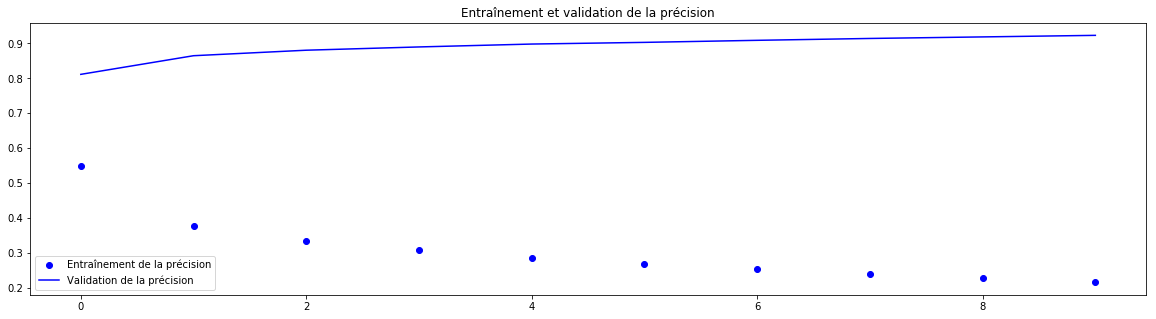

In [71]:
def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']
    
    loss = history.history['loss']
    acc = history.history['acc']

    every_sample =  int(epochs / samples)
    loss = pd.DataFrame(loss)
    acc = pd.DataFrame(acc)

    fig, ax = plt.subplots(figsize=(20,5))

    ax.plot(loss, 'bo', label='Entraînement de la précision')
    ax.plot(acc, 'b', label='Validation de la précision')
    ax.set_title('Entraînement et validation de la précision')
    ax.legend()

plot_history(History)

## Exercice 4 – Les Callbacks

### 4.1)
La méthode `fit()` accepte un argument `callbacks`. Entrainer le modèle avec un grand nombre de `epoch` en y ajoutant les *callbacks* suvants (les callback proviennent de la librairie `keras.callbacks` et sont définis dans un tableau :
* `EarlyStopping`: avec `patience=5` pour arrêter l'apprentissage dès que le modèle ne change plus (5 epoch de marge)
* `ModelCheckpoint`: specifie le nom du modèle à enregistrer (exemple `"mnist_fashion.h5"`) avec `save_best_only=True` pour enregistrer le meilleur modèle obtenu.

callbacks=\[keras.callbacks.EarlyStopping......,
    keras.callbacks........\]<br/>
history = model.fit(............,
                    callbacks=callbacks)

Le callback `EarlyStopping` permettra de réduire les risques de sur-apprentissage.

In [72]:
keras.callbacks.Callback()

In [73]:
callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0)

In [74]:
model = None
model = create_model()
History = model.fit(X_train_standardise, y_train, validation_data=(X_valid,y_valid), epochs=10, callbacks=[callbacks])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 172us/step - loss: 0.5248 - acc: 0.8149 - val_loss: 4.9281 - val_acc: 0.6786
Epoch 2/10
55000/55000 [==============================] - 9s 156us/step - loss: 0.3709 - acc: 0.8658 - val_loss: 3.9815 - val_acc: 0.7354
Epoch 3/10
55000/55000 [==============================] - 9s 157us/step - loss: 0.3308 - acc: 0.8793 - val_loss: 3.5137 - val_acc: 0.7666
Epoch 4/10
55000/55000 [==============================] - 9s 157us/step - loss: 0.3041 - acc: 0.8902 - val_loss: 4.0353 - val_acc: 0.7352
Epoch 5/10
55000/55000 [==============================] - 9s 156us/step - loss: 0.2834 - acc: 0.8973 - val_loss: 3.6514 - val_acc: 0.7590
Epoch 6/10
55000/55000 [==============================] - 9s 155us/step - loss: 0.2655 - acc: 0.9031 - val_loss: 3.3236 - val_acc: 0.7790
Epoch 7/10
55000/55000 [==============================] - 9s 158us/step - loss: 0.2506 - acc: 0.9086 - val_loss: 3.8519 - v

In [75]:
model.evaluate(X_valid,y_valid)

5000/5000 [==============================] - 0s 68us/step


[3.431984852218628, 0.7752]

### 4.2)

Grâce aux callbacks, le dernier modèle enregistré est le meilleur sur le jeu de validation.<br>
Charger le modèle avec 'keras. Models. load_model () et l'évaluer sur l'ensemble de test.

In [84]:
model.save('my_model.h5')

In [85]:
new_model = keras.models.load_model('my_model.h5')

In [86]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [87]:
loss, acc = new_model.evaluate(X_test, y_test)
print("Vérification du modèle, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 1s 73us/step
Vérification du modèle, accuracy: 76.52%


Une liste de callbacks est disponible sur https://keras.io/callbacks/